In [1]:
## ways to label a scatter plot
# https://nikkimarinsek.com/blog/7-ways-to-label-a-cluster-plot-python
# https://github.com/nmarinsek/data-visualization-notebooks/blob/master/labeled_cluster_plots.ipynb

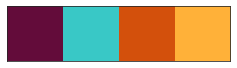

In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#set font size of labels on matplotlib plots
plt.rc('font', size=16)

#set style of plots
sns.set_style('white')

#define a custom palette
customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139']
sns.set_palette(customPalette)
sns.palplot(customPalette)

In [4]:
# Create labeled groups of data

#number of points per group
n = 50

#define group labels and their centers
groups = {'A': (2,2),
          'B': (3,4),
          'C': (4,4),
          'D': (4,1)}

#create labeled x and y data
data = pd.DataFrame(index=range(n*len(groups)), columns=['x','y','label'])
for i, group in enumerate(groups.keys()):
    #randomly select n datapoints from a gaussian distrbution
    data.loc[i*n:((i+1)*n)-1,['x','y']] = np.random.normal(groups[group], 
                                                           [0.5,0.5], 
                                                           [n,2])
    #add group labels
    data.loc[i*n:((i+1)*n)-1,['label']] = group

data.head()

,x,y,label
0,2.11746,2.1649,A
1,1.83273,2.20952,A
2,1.30619,1.37827,A
3,2.3457,2.12085,A
4,1.93445,2.09809,A


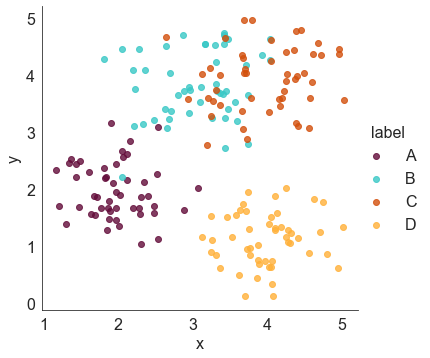

In [5]:
# Style 1: Standard legend

#plot data with seaborn
facet = sns.lmplot(data=data, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)

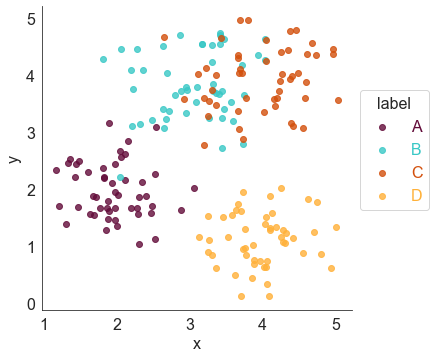

In [6]:
# Style 2: Color-coded legend

#plot data with seaborn (don't add a legend yet)
facet = sns.lmplot(data=data, x='x', y='y', hue='label', 
                   fit_reg=False, legend=False)

#add a legend
leg = facet.ax.legend(bbox_to_anchor=[1, 0.75],
                         title="label", fancybox=True)
#change colors of labels
for i, text in enumerate(leg.get_texts()):
    plt.setp(text, color = customPalette[i])

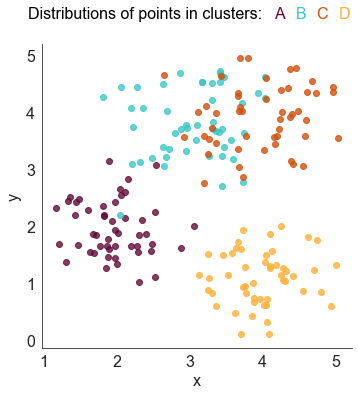

In [7]:
# Style 3: Color-coded title

#plot data with seaborn
facet = sns.lmplot(data=data, x='x', y='y', hue='label', 
                   fit_reg=False, legend=False)

#define padding -- higher numbers will move title rightward
pad = 4

#define separation between cluster labels
sep = 0.3

#define y position of title
y = 5.6

#add beginning of title in black
facet.ax.text(pad, y, 'Distributions of points in clusters:', 
              ha='right', va='bottom', color='black')

#add color-coded cluster labels
for i, label in enumerate(groups.keys()):
    text = facet.ax.text(pad+((i+1)*sep), y, label, 
                         ha='right', va='bottom',
                         color=customPalette[i])

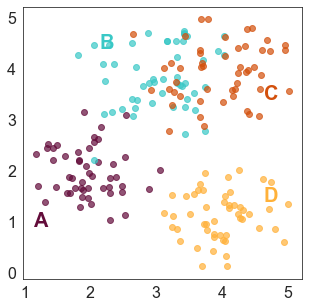

In [8]:
# Style 4: Labels next to clusters

#define labels and where they should go
labels = {'A': (1.25,1),
          'B': (2.25,4.5),
          'C': (4.75,3.5),
          'D': (4.75,1.5)}

#create a new figure
plt.figure(figsize=(5,5))

#loop through labels and plot each cluster
for i, label in enumerate(groups.keys()):

    #add data points 
    plt.scatter(x=data.loc[data['label']==label, 'x'], 
                y=data.loc[data['label']==label,'y'], 
                color=customPalette[i], 
                alpha=0.7)
    
    #add label
    plt.annotate(label, 
                 labels[label],
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=20, weight='bold',
                 color=customPalette[i])

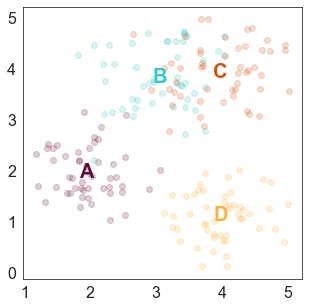

In [9]:
# Style 5: Labels centered on cluster means

#create a new figure
plt.figure(figsize=(5,5))

#loop through labels and plot each cluster
for i, label in enumerate(groups.keys()):

    #add data points 
    plt.scatter(x=data.loc[data['label']==label, 'x'], 
                y=data.loc[data['label']==label,'y'], 
                color=customPalette[i], 
                alpha=0.20)
    
    #add label
    plt.annotate(label, 
                 data.loc[data['label']==label,['x','y']].mean(),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=20, weight='bold',
                 color=customPalette[i])

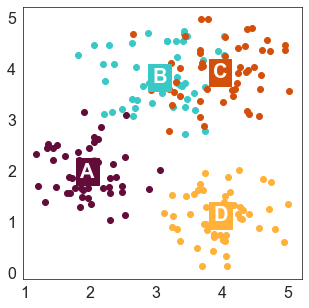

In [10]:
# Style 6: Labels centered on cluster means

#create a new figure
plt.figure(figsize=(5,5))

#loop through labels and plot each cluster
for i, label in enumerate(groups.keys()):

    #add data points 
    plt.scatter(x=data.loc[data['label']==label, 'x'], 
                y=data.loc[data['label']==label,'y'], 
                color=customPalette[i], 
                alpha=1)
    
    #add label
    plt.annotate(label, 
                 data.loc[data['label']==label,['x','y']].mean(),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=20, weight='bold',
                 color='white',
                 backgroundcolor=customPalette[i])

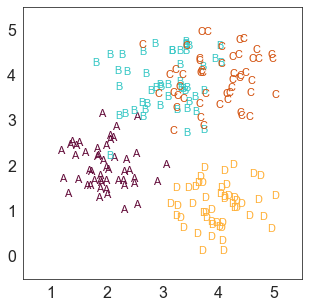

In [11]:
# Style 7: Text markers

#create a new figure and set the x and y limits
fig, axes = plt.subplots(figsize=(5,5))
axes.set_xlim(0.5,5.5)
axes.set_ylim(-0.5,5.5)

#loop through labels and plot each cluster
for i, label in enumerate(groups.keys()):

    #loop through data points and plot each point 
    for l, row in data.loc[data['label']==label,:].iterrows():
    
        #add the data point as text
        plt.annotate(row['label'], 
                     (row['x'], row['y']),
                     horizontalalignment='center',
                     verticalalignment='center',
                     size=11,
                     color=customPalette[i])